**Creating a model for predicting the presence of bronchitis**

In [ ]:
#Importing the libraries necessary to load the dataset and split the dataset into a training and a test set
import pandas as pd
from sklearn.model_selection import train_test_split

# Loading the dataset that was downloaded locally on the computer and then added to the content on Google Colab
file_path = "/content/Baza pneumonije_LS.xlsx"
bronchitis = pd.read_excel(file_path, sheet_name="Bronhitis")
no_respiratory_diseases = pd.read_excel(file_path, sheet_name="Bez plućnih bolesti")

# Addition of a target variable indicating the presence/absence of bronchitis
bronchitis['bronchitis'] = 1  # Patients with bronchitis
no_respiratory_diseases['bronchitis'] = 0  # Patients without bronchitis

# Combining sheets from Excel (Sheet containing patients with bronchitis and sheet containing patients without lung diseases)
data = pd.concat([bronchitis, no_respiratory_diseases], ignore_index=True)

# Verifying the column names
print("Available columns:", data.columns)

# Selection of relevant features from the dataset (based on correlation analysis)
features = ['CRP (mg/L)', 'Nutrofili', 'Limfociti', 'fibrinogen (mg/dL)']
X = data[features]
y = data['bronchitis']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("The dataset has been loaded and split.")

Available columns: Index(['Sample ', 'spol', 'godine', 'grupa', 'starost', 'ITB indeks',
       'skor ITB', 'bolesti grade', 'bolesti', 'nalaz grade', 'nalaz',
       'lab gradus', 'lab', 'pušenje', 'preko 65', 'hronične bronhopulmonarne',
       'pridružene ', 'imunosupresija', 'alergija', 'alkohol', 'zrak',
       'malnutricija', 'klinička podjela', 'etiološka', 'CURB', 'kašalj ',
       'ekspektoracija', 'dispneje', 'pleuralni bol', '1.temperatura',
       '2.groznica', '3.znojenje', '4.bolovi u misicima', '5.glavobolja',
       '6.gubitak apetita', 'auskultacija', 'sputum', 'rtg',
       'Sedimentacija /h', 'fibrinogen (mg/dL)', 'CRP (mg/L)', 'Leukociti',
       'Nutrofili', 'Limfociti', 'Monociti', 'bazofil', 'eozinofili',
       'spirometrija', 'bronchitis'],
      dtype='object')
The dataset has been loaded and split.


Data scaling and dimensionality reduction (using PCA)

In [ ]:
# Importing StandardScaler from the sklearn library to standardize the data to prepare it for PCA as such
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying PCA
pca = PCA(n_components=2)  # Reducing to 2 components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("The data has been scaled and PCA has been applied.")

The data has been scaled and PCA has been applied.


Implementing a Voting Classifier in scikit-learn and training a model for predicting bronchitis

In [ ]:
# Importing required libraries
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Defining the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
svc = SVC(probability=True, random_state=42)
rf = RandomForestClassifier(random_state=42)

# Application of Voting Classifier in order to connect the previously mentioned algorithms
voting_clf = VotingClassifier(
    estimators=[('log_reg', log_reg), ('svc', svc), ('rf', rf)],
    voting='soft'
)

# Training the model
voting_clf.fit(X_train_pca, y_train)

# Predictions on the test set
y_pred = voting_clf.predict(X_test_pca)

# Metrics for model evaluation
print("Model evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Model evaluation:
Accuracy: 0.9683333333333334
Precision: 0.9932885906040269
Recall: 0.9456869009584664
F1-score: 0.9689034369885434


Saving the trained model

In [ ]:
# Importing a library to load and save machine learning models
import joblib

# Saving the trained model, scaler and PCA
joblib.dump(voting_clf, "voting_classifier_pca_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca.pkl")
print("The model, scaler, and PCA have been saved.")

The model, scaler, and PCA have been saved.


**Below are the test data for model. For the case of a bronchitis patient and a healthy patient.**

Test data of a patient with bronchitis and his findings:

CRP (mg/L): **31.02**

Neutrophils: **4.20**

Lymphocytes: **9.56**

Fibrinogen (mg/dL): **423.60**

Test data of a patient who does not have bronchitis and his findings:

CRP (mg/L): **4.39**

Neutrophils: **4.77**

Lymphocytes: **3.53**

Fibrinogen (mg/dL): **358.85**

Showing how to use a previously saved model to predict on new data

In [ ]:
import joblib
import numpy as np
import pandas as pd

# Loading the saved objects
voting_clf_loaded = joblib.load("voting_classifier_pca_model.pkl")
scaler = joblib.load("scaler.pkl")
pca = joblib.load("pca.pkl")

# Prediction for input values
def predict_with_saved_model():
    print("Enter the following values for the patient:")

    crp = float(input("CRP (mg/L): "))
    neutrophils = float(input("Neutrophils: "))
    lymphocytes = float(input("Lymphocytes: "))
    fibrinogen = float(input("Fibrinogen (mg/dL): "))

    input_data = pd.DataFrame({
        "CRP (mg/L)": [crp],
        "Nutrofili": [neutrophils],
        "Limfociti": [lymphocytes],
        "fibrinogen (mg/dL)": [fibrinogen]
    })

    # Scaling and PCA transformation
    input_data_scaled = scaler.transform(input_data)
    input_data_pca = pca.transform(input_data_scaled)

    # Prediction
    prediction = voting_clf_loaded.predict(input_data_pca)

    if prediction[0] == 1:
        print("\nModel predicts: The patient has bronchitis.")
    else:
        print("\nModel predicts: The patient does not have bronchitis.")

# Testing the prediction
predict_with_saved_model()

Enter the following values for the patient:
CRP (mg/L): 4.39
Neutrophils: 4.77
Lymphocytes: 3.53
Fibrinogen (mg/dL): 358.85

Model predicts: The patient does not have bronchitis.


Visualization of model evaluation metrics

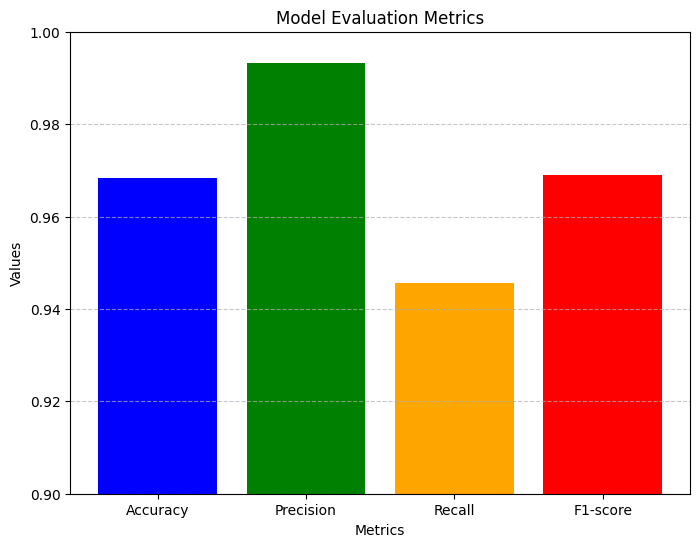

In [ ]:
import matplotlib.pyplot as plt

# Metrics to visualize
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [0.9683333333333334, 0.9932885906040269, 0.9456869009584664, 0.9689034369885434]

# Plotting the metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0.9, 1.0)
plt.title("Model Evaluation Metrics")
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

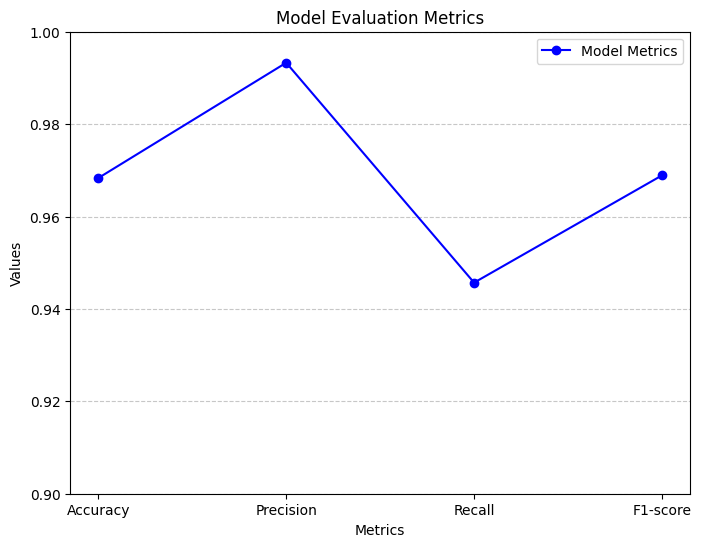

In [ ]:
import matplotlib.pyplot as plt

# Metrics to visualize
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [0.9683333333333334, 0.9932885906040269, 0.9456869009584664, 0.9689034369885434]

# Plotting the metrics
plt.figure(figsize=(8, 6))
plt.plot(metrics, values, marker='o', linestyle='-', color='blue', label='Model Metrics')
plt.ylim(0.9, 1.0)
plt.title("Model Evaluation Metrics")
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Visual representation of the confusion matrix on the test data

Text(0, 0.5, 'True Class')

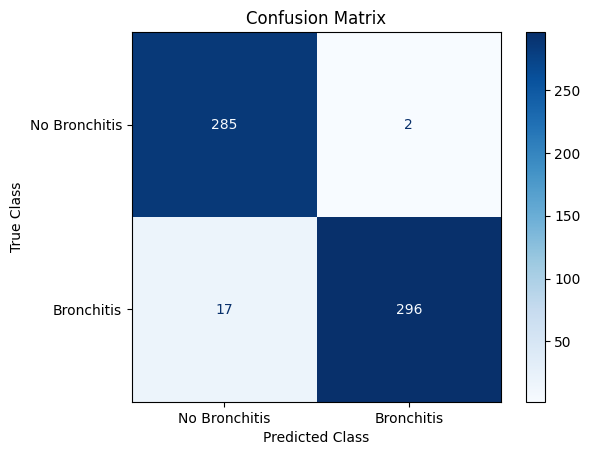

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Bronchitis", "Bronchitis"])
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix")
disp.ax_.set_xlabel("Predicted Class")
disp.ax_.set_ylabel("True Class")

Correlation matrix visualization

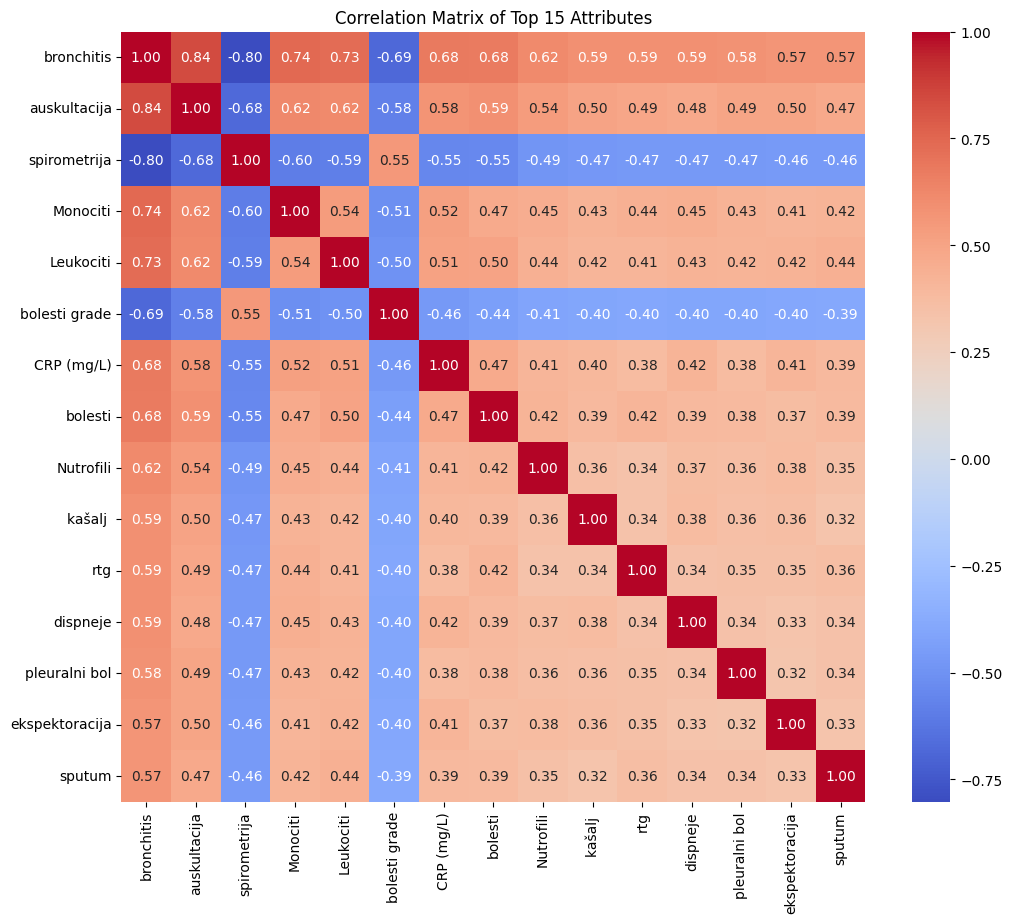

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/Baza pneumonije_LS.xlsx"
bronchitis = pd.read_excel(file_path, sheet_name="Bronhitis")
no_respiratory_diseases = pd.read_excel(file_path, sheet_name="Bez plućnih bolesti")

# Addition of a target variable indicating the presence/absence of bronchitis
bronchitis['bronchitis'] = 1  # Patients with bronchitis
no_respiratory_diseases['bronchitis'] = 0  # Patients without bronchitis


data = pd.concat([bronchitis, no_respiratory_diseases], ignore_index=True)

# Selection of numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Checking for the presence of the target variable
if 'bronchitis' not in numeric_data.columns:
    raise ValueError("The target column 'bronchitis' is not found in the dataset!")

# Calculate the absolute correlations with 'bronchitis' and sort them
correlation_with_target = numeric_data.corr()['bronchitis'].abs().sort_values(ascending=False)

# Selection of the top 15 most related attributes (including 'bronchitis' itself)
top_15_attributes_with_target = correlation_with_target.index[:15]

# Generate a refined correlation matrix for the selected attributes
correlation_matrix_fixed = numeric_data[top_15_attributes_with_target].corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_fixed, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Top 15 Attributes")
plt.show()

**Creating a simple user interface**

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import joblib
import pandas as pd

# Load the saved model, scaler, and PCA
voting_clf_loaded = joblib.load("voting_classifier_pca_model.pkl")
scaler = joblib.load("scaler.pkl")
pca = joblib.load("pca.pkl")

# Prediction function
def predict_bronchitis(crp, neutrophils, lymphocytes, fibrinogen):
    # Create a DataFrame from input data
    input_data = pd.DataFrame({
        "CRP (mg/L)": [crp],
        "Nutrofili": [neutrophils],
        "Limfociti": [lymphocytes],
        "fibrinogen (mg/dL)": [fibrinogen]
    })

    # Scale and apply PCA to input data
    input_data_scaled = scaler.transform(input_data)
    input_data_pca = pca.transform(input_data_scaled)

    # Make a prediction
    prediction = voting_clf_loaded.predict(input_data_pca)

    # Return result
    return "The patient has bronchitis." if prediction[0] == 1 else "The patient does not have bronchitis."

# Gradio interface
interface = gr.Interface(
    fn=predict_bronchitis,
    inputs=[
        gr.Number(label="CRP (mg/L)"),
        gr.Number(label="Neutrophils"),
        gr.Number(label="Lymphocytes"),
        gr.Number(label="Fibrinogen (mg/dL)")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Bronchitis Prediction",
    description="Enter the patient's metrics to determine if they have bronchitis or not."
)

# Launch the application
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dcb630aae9dceadf3e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
